In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import lite
from PIL import Image

In [0]:
img = Image.open("/content/drive/My Drive/Colab Notebooks/258_project_personal/sign_language/test/258.jpg")

In [0]:
interpreter = lite.Interpreter("/content/drive/My Drive/Colab Notebooks/258_project_personal/saved_models/mobilenet.tflite")
interpreter.allocate_tensors()

In [0]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = (np.float32(img) / 255).reshape(1,64,64,1)
input_data = tf.convert_to_tensor(input_data, np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

In [0]:
interpreter.invoke()

In [7]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[2.6527189e-08 4.4162855e-02 3.3086036e-07 1.9834156e-06 1.7126490e-08
  1.5372700e-06 3.9207917e-09 1.1200069e-06 1.4149279e-03 9.5441723e-01]]


Predicted Hand Sign: 9


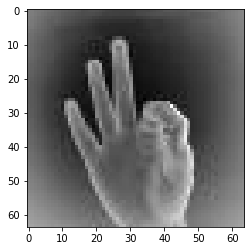

In [8]:
plt.imshow(img,cmap='gray')
print('Predicted Hand Sign:',np.argmax(output_data))